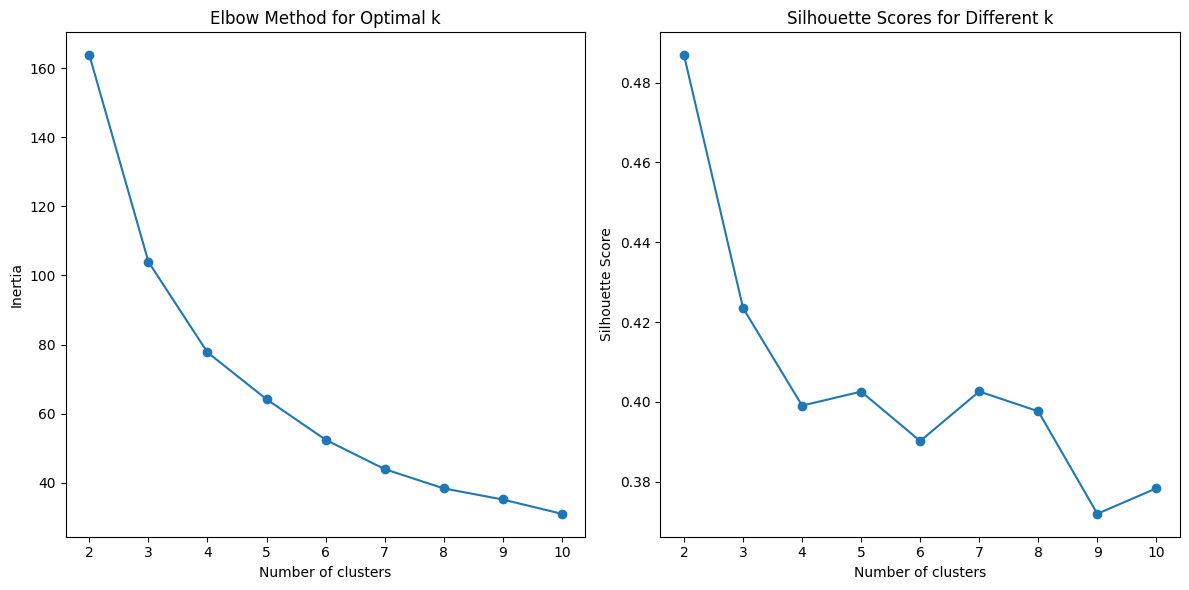

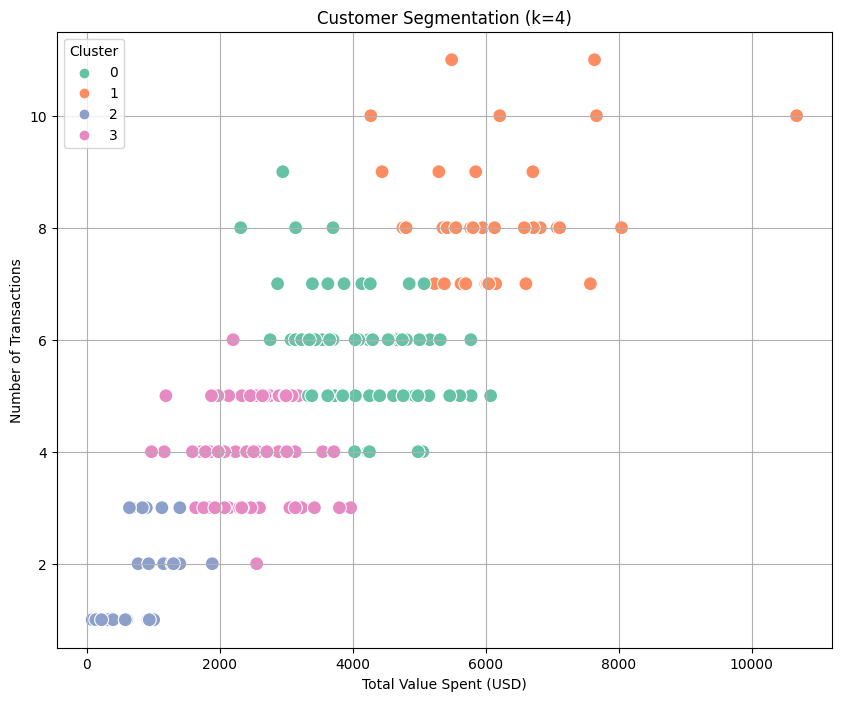

Number of clusters formed: 4
Davies-Bouldin Index: 0.8001
Average Silhouette Score: 0.3991


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load datasets
customers = pd.read_csv('/kaggle/input/zeotap-pdataset/Data.csv/Customers.csv')
transactions = pd.read_csv('/kaggle/input/zeotap-pdataset/Data.csv/Transactions.csv')

# Data Preparation
# Merge transactions with customer data
merged_data = transactions.merge(customers, on='CustomerID')

# Create a customer profile based on total spent and number of transactions
customer_profile = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total amount spent
    'TransactionID': 'count'  # Number of transactions
}).reset_index()

# Rename columns for clarity
customer_profile.rename(columns={'TransactionID': 'NumTransactions'}, inplace=True)

# Normalize the data for clustering
scaler = StandardScaler()
scaled_profiles = scaler.fit_transform(customer_profile[['TotalValue', 'NumTransactions']])

# Determine optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  # Explicitly set n_init
    kmeans.fit(scaled_profiles)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(scaled_profiles, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the elbow curve and silhouette scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose optimal number of clusters (e.g., 4 based on elbow method)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)  # Explicitly set n_init
customer_profile['Cluster'] = kmeans.fit_predict(scaled_profiles)

# Calculate clustering metrics
db_index = davies_bouldin_score(scaled_profiles, customer_profile['Cluster'])
silhouette_avg = silhouette_score(scaled_profiles, customer_profile['Cluster'])

# Visualize clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=customer_profile, x='TotalValue', y='NumTransactions', hue='Cluster', palette='Set2', s=100)
plt.title(f'Customer Segmentation (k={optimal_clusters})')
plt.xlabel('Total Value Spent (USD)')
plt.ylabel('Number of Transactions')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Save results to CSV if needed
customer_profile.to_csv('Customer_Segmentation_Results.csv', index=False)

print(f"Number of clusters formed: {optimal_clusters}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Average Silhouette Score: {silhouette_avg:.4f}")
